In [3]:
import piplite
piplite.install('seaborn')

<PyodideTask pending name='Task-31' coro=<_install() running at /lib/python3.12/site-packages/piplite/piplite.py:109> cb=[WebLoop._decrement_in_progress()]>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('medical_examination.csv')
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# Add BMI and overweight column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns='BMI', inplace=True)

# Normalize cholesterol and gluc (0 = good, 1 = bad)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


<ipython-input-10-3671bc161cba>:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  catplot.fig.show()


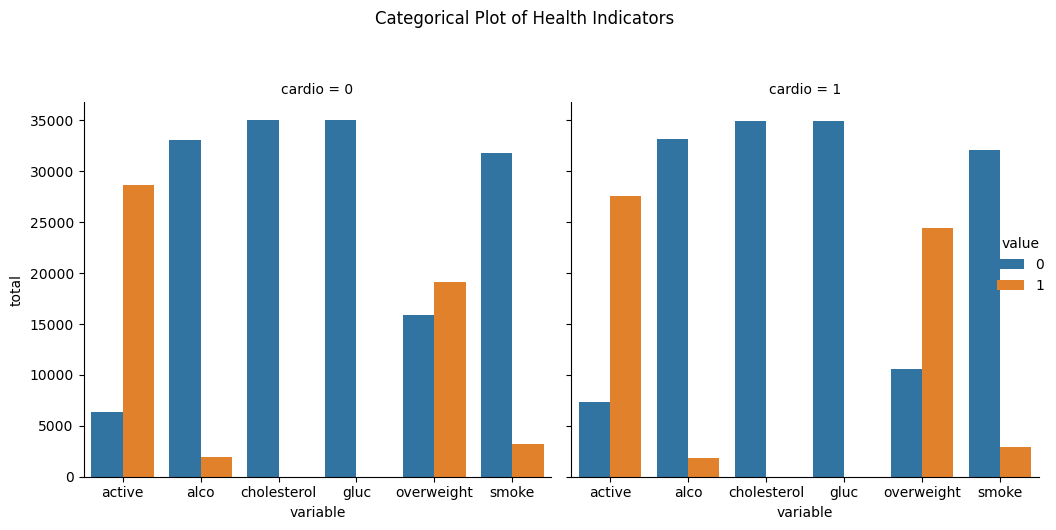

In [10]:
df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
)

# Group and count the values
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

# Draw catplot
catplot = sns.catplot(
    x='variable',
    y='total',
    hue='value',
    col='cardio',
    kind='bar',
    data=df_cat
)

# Show and save
catplot.fig.suptitle("Categorical Plot of Health Indicators", y=1.05)
catplot.fig.tight_layout()
catplot.fig.savefig('catplot.png')
catplot.fig.show()

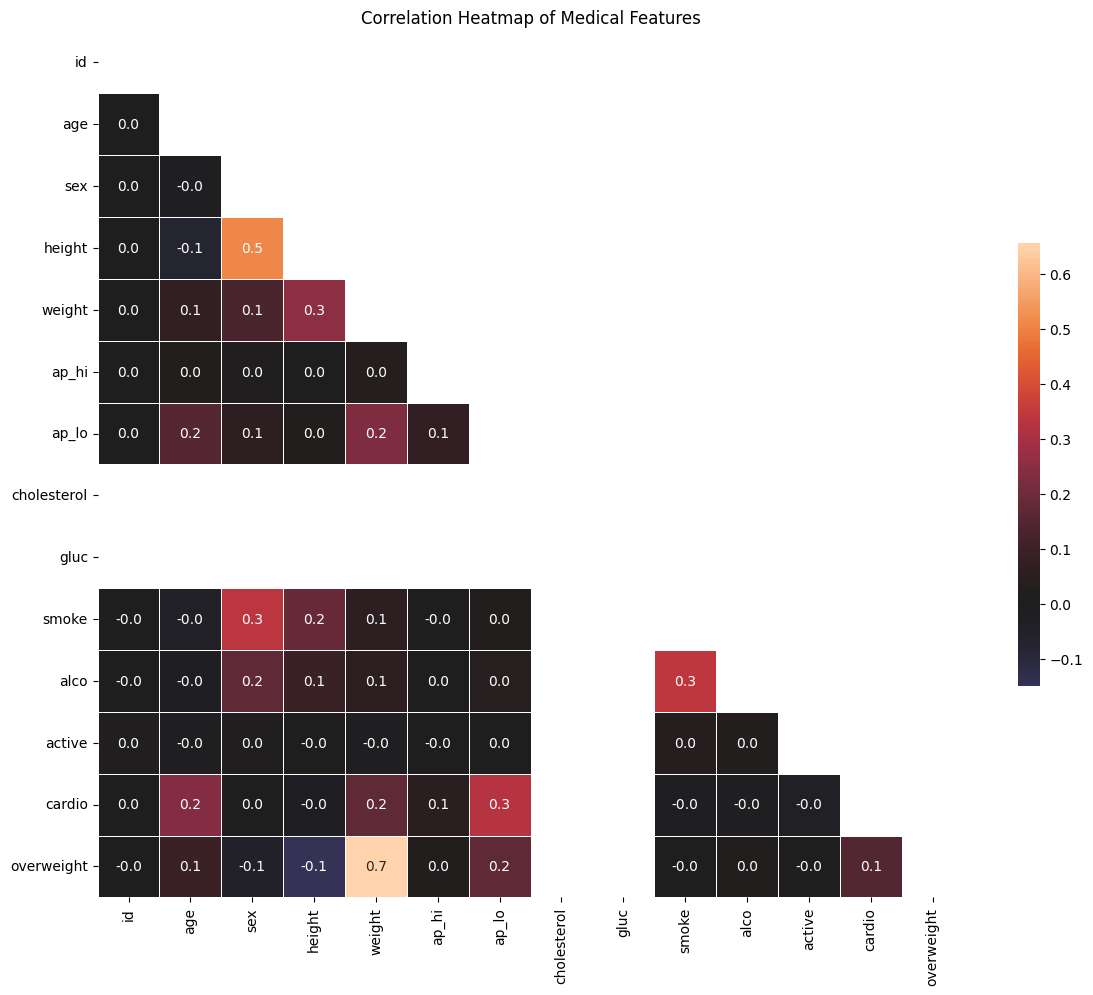

In [13]:
# Clean data for heatmap
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

# Correlation matrix
corr = df_heat.corr(numeric_only=True)

# Mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

# Show and save
plt.title("Correlation Heatmap of Medical Features")
plt.tight_layout()
fig.savefig('heatmap.png')
plt.show()